### Regression Tree

In [76]:
# Imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [77]:
import pandas as pd

df = pd.read_csv('PCA_final.csv')
display(df.head())

,date,location_key,inc_case,inc_hosp,inc_death,sni_covid19_vaccination,liberalism,children,adult,elderly,...,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,population,PC1,PC2,PC3
0,2021-01,Alabama,112124.0,1.371155,1.584112,0.032568,0.0,-0.231951,-0.23737,-0.19908,...,-1.154831,-1.239613,-1.010675,-0.710112,-0.403022,1.149867,-0.21489,-2.396417,-0.262114,-0.155315
1,2021-02,Alabama,37101.0,0.126002,1.194710,0.473211,0.0,-0.231951,-0.23737,-0.19908,...,-1.038818,-0.898820,-1.003504,-0.668582,0.006228,0.932787,-0.21489,-1.972958,-0.522742,0.003450
2,2021-03,Alabama,21389.0,-0.262578,-0.136938,0.761413,0.0,-0.231951,-0.23737,-0.19908,...,0.239033,-0.186514,-0.539392,0.198196,0.400880,-0.313185,-0.21489,0.139648,-0.682227,-0.173175
3,2021-04,Alabama,11826.0,-0.305176,-0.341053,0.151403,0.0,-0.231951,-0.23737,-0.19908,...,0.608491,0.280345,-0.245660,0.596958,0.505887,-0.860254,-0.21489,1.069035,-0.646917,-0.263173
4,2021-05,Alabama,17507.0,-0.310958,-0.363649,-0.620656,0.0,-0.231951,-0.23737,-0.19908,...,0.494305,0.795346,-0.132359,0.702473,0.406098,-0.821837,-0.21489,1.286734,-0.405888,-0.361615


In [78]:
X = df[['sni_covid19_vaccination','new_persons_vaccinated', 'stringency_index', 'inc_death', 
        'PC1', 'PC2', 'PC3', 'inc_hosp', 'children', 'adult', 'elderly', 'liberalism', 'population']]
y = df['inc_case']

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (594, 13), y_train shape: (594,)
X_test shape: (255, 13), y_test shape: (255,)


#### **METHOD 1: Random Forest**

In [80]:
# Define an Random Forest object using RandomForestRegressor 
regression_tree = RandomForestRegressor()
# Fit the model
regression_tree.fit(X_train, y_train)

RandomForestRegressor()

In [81]:
# Make predictions
y_pred = regression_tree.predict(X_test)

#### METHOD 1.1: Visualization of Random Forest

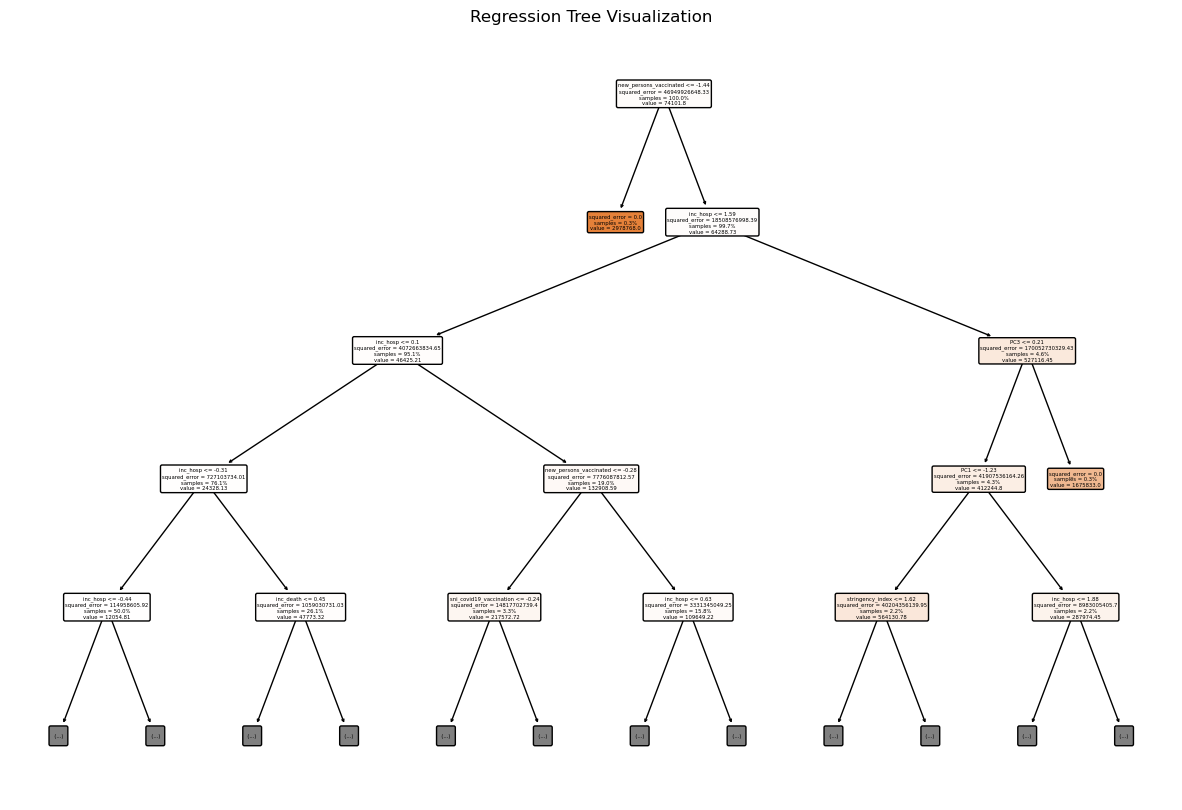

In [82]:
# Visualize the regression tree using plot_tree
individual_tree = regression_tree.estimators_[0] 

plt.figure(figsize=(15, 10))
plot_tree(individual_tree, feature_names=list(X.columns), filled=True, rounded=True, proportion=True, precision=2, max_depth= 4)
plt.title("Regression Tree Visualization")
plt.show()

#### METHOD 1.2: Evaluation Metrics

In [83]:
# Evaluate the model using MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Calculate coverage
coverage = np.mean((y_test >= np.min(y_pred)) & (y_test <= np.max(y_pred))) * 100
print(f'Coverage: {coverage:.2f}%')

# Calculate bias
bias = np.mean(y_pred - y_test)
print(f'Bias: {bias:.2f}')

Mean Squared Error: 3889186869.3105774
Root Mean Squared Error: 62363.345558994646
Coverage: 96.47%
Bias: -5636.16


#### METHOD 1.3: Feature Importance

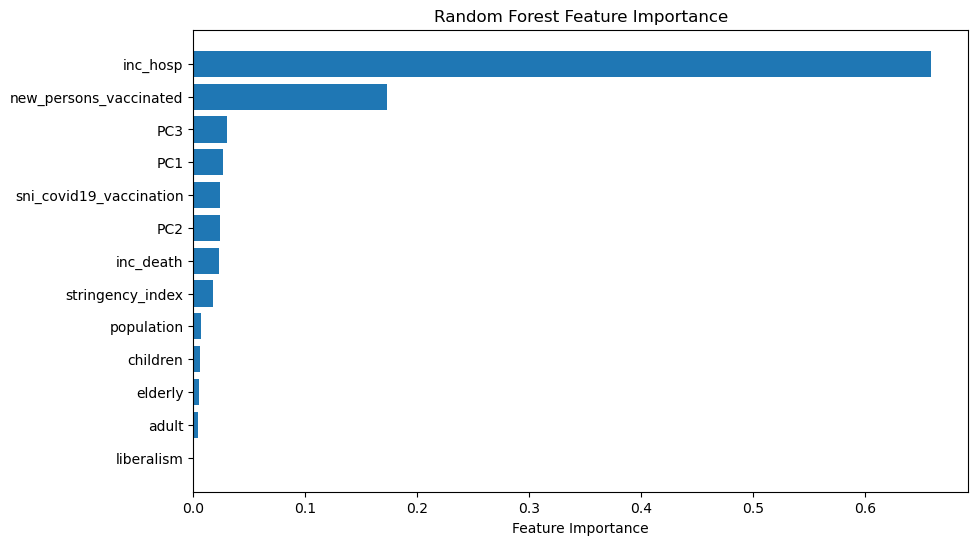

In [84]:
# Get feature importances from the random forest model
feature_importances = regression_tree.feature_importances_

# Get the names of features
feature_names = list(X.columns)

# Sort features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

#### METHOD 1.4: Predictions vs. Actual Values

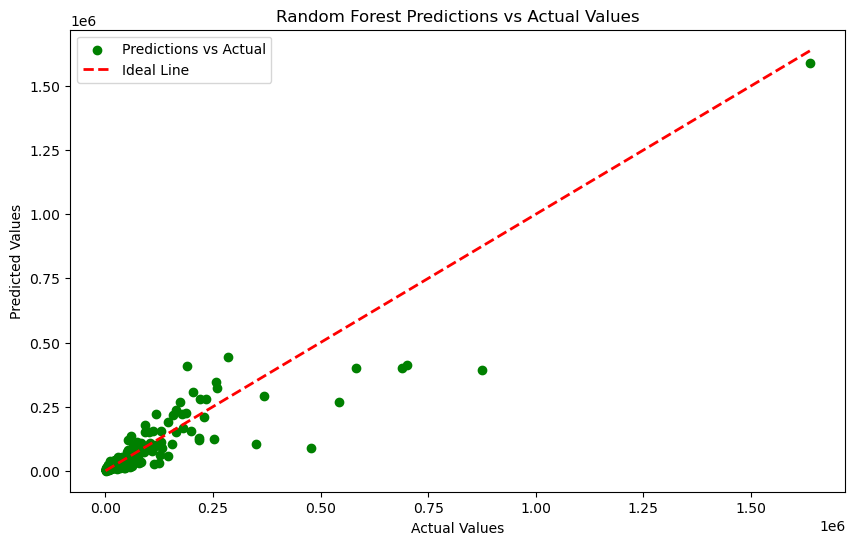

In [85]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Predictions vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Random Forest Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#### METHOD 1.5: Histogram of Residuals

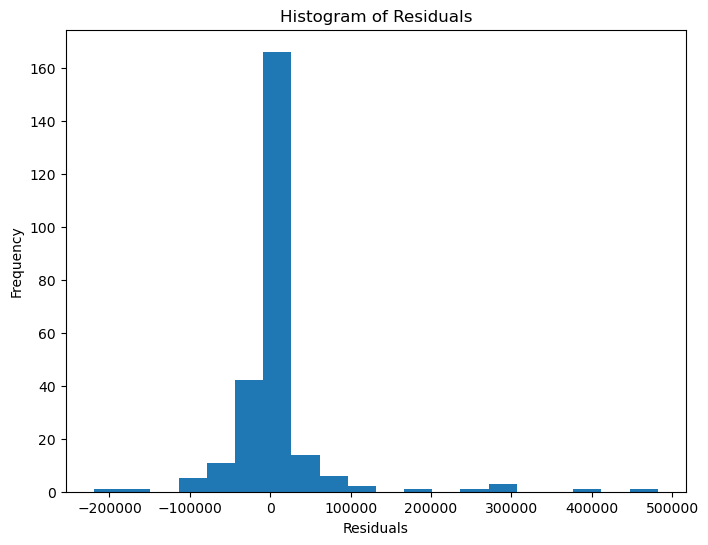

In [86]:
#Calculate Residuals
residuals = y_test - y_pred

#Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#### **METHOD 2: Bagging**

In [87]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

# Defining and fitting the model
# 50 base estimators (linear regression models) are trained with different subsets of the training data
bagging_model = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_model.predict(X_test)

/opt/anaconda3/envs/cssci/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


#### METHOD 2.1: Evaluation Metrics

In [88]:
# Evaluate the model
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
rmse_bagging = np.sqrt(mse_bagging)
print(f'Mean Squared Error (Bagging): {mse_bagging}')
print(f'Root Mean Squared Error (Bagging): {rmse_bagging}')

# Calculate coverage
coverage = np.mean((y_test >= np.min(y_pred_bagging)) & (y_test <= np.max(y_pred_bagging))) * 100
print(f'Coverage: {coverage:.2f}%')

# Calculate bias
bias = np.mean(y_pred_bagging - y_test)
print(f'Bias: {bias:.2f}')

Mean Squared Error (Bagging): 7250795796.990192
Root Mean Squared Error (Bagging): 85151.60478223645
Coverage: 99.61%
Bias: -7130.55


#### METHOD 2.2: Predictions vs. Actual Values

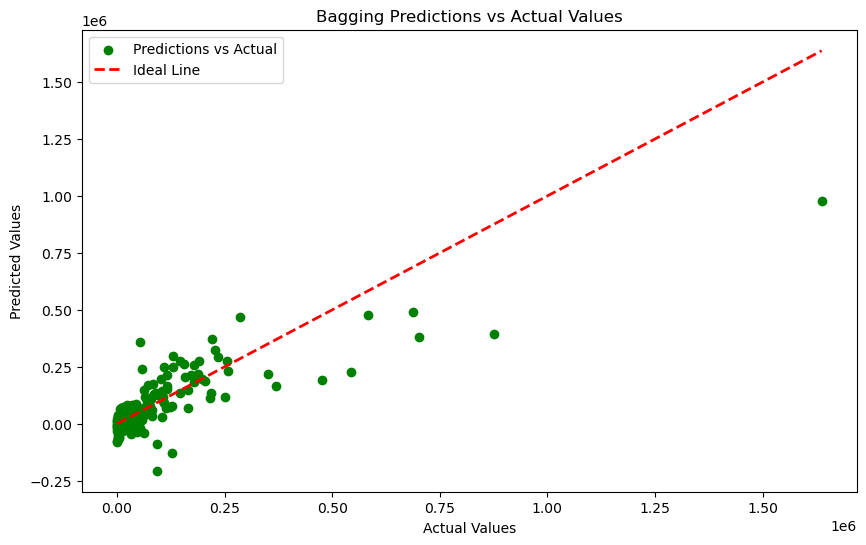

In [89]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bagging, color='green', label='Predictions vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Bagging Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#### **METHOD 3: AdaBoost Regressor**

In [90]:
from sklearn.ensemble import AdaBoostRegressor

# Defining and fitting the model
adaboost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Make predictions
y_pred_adaboost = adaboost_model.predict(X_test)

/opt/anaconda3/envs/cssci/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


#### 3.1: Evaluation Metrics

In [91]:
# Evaluate the model
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
rmse_adaboost = np.sqrt(mse_adaboost)
print(f'Mean Squared Error (AdaBoost): {mse_adaboost}')
print(f'Root Mean Squared Error (AdaBoost): {rmse_adaboost}')

# Calculate coverage
coverage = np.mean((y_test >= np.min(y_pred_adaboost)) & (y_test <= np.max(y_pred_adaboost))) * 100
print(f'Coverage: {coverage:.2f}%')

# Calculate bias
bias = np.mean(y_pred_adaboost - y_test)
print(f'Bias: {bias:.2f}')

Mean Squared Error (AdaBoost): 8721033452.029945
Root Mean Squared Error (AdaBoost): 93386.4736031399
Coverage: 22.35%
Bias: 63528.54


#### 3.2: Predictions vs. Actual Values

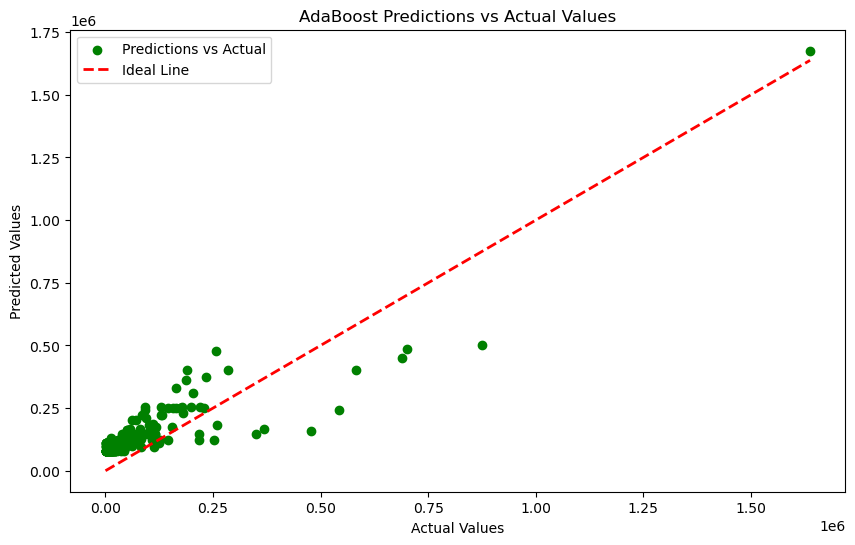

In [92]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_adaboost, color='green', label='Predictions vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('AdaBoost Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#### **METHOD 4: XGBoost Regressor**

In [93]:
from xgboost import XGBRegressor

# Defining and fitting the model
xgb_model = XGBRegressor(max_depth=3, n_estimators=50, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

#### METHOD 4.1: Evaluation Metrics

In [94]:
# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse_xgb)
print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'Root Mean Squared Error: {rmse}')

# Calculate coverage
coverage = np.mean((y_test >= np.min(y_pred_xgb)) & (y_test <= np.max(y_pred_xgb))) * 100
print(f'Coverage: {coverage:.2f}%')

# Calculate bias
bias = np.mean(y_pred_xgb - y_test)
print(f'Bias: {bias:.2f}')

Mean Squared Error (XGBoost): 2894838434.294625
Root Mean Squared Error: 53803.70279353108
Coverage: 99.61%
Bias: -5848.67


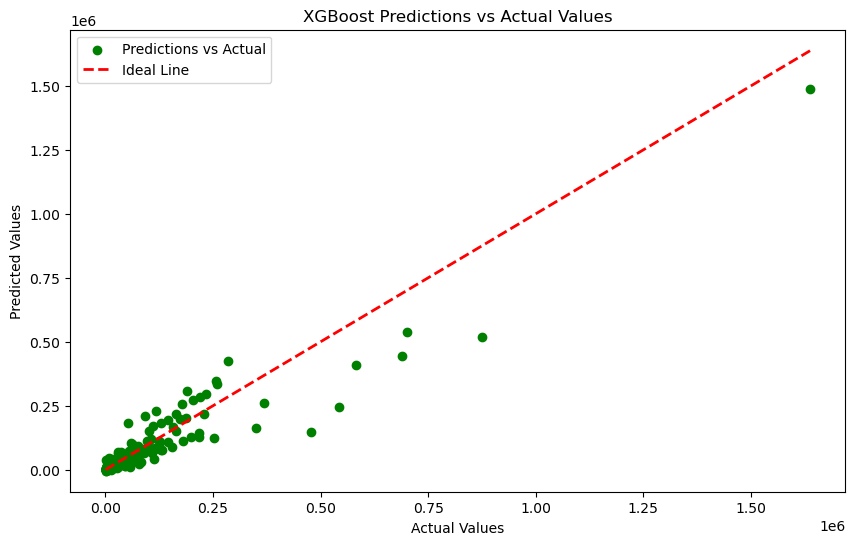

In [95]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='green', label='Predictions vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')

plt.title('XGBoost Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [96]:
# Final merged_data
merged_df_final = pd.read_csv('merged_df_final.csv')

# Function for random forest to calculate model, mse, rmse, coverage, bias
def evaluate_model(df):
    X = df[['liberalism']]
    y = df['inc_case']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    coverage = ((y_test >= y_pred) & (y_test <= y_pred)).mean()
    bias = np.mean(y_pred - y_test)
    return model, mse, rmse, coverage, bias

# Liberal states vs Conservative states
liberal_df = merged_df_final[merged_df_final['liberalism'] == 1]
conservative_df = merged_df_final[merged_df_final['liberalism'] == 0]

# Evaluation
liberal_model, liberal_mse, liberal_rmse, liberal_coverage, liberal_bias = evaluate_model(liberal_df)
conservative_model, conservative_mse, conservative_rmse, conservative_coverage, conservative_bias = evaluate_model(conservative_df)

#Liberal metrics
print('Metrics for Liberalism Model:')
print('Mean Squared Error:', liberal_mse)
print('Root Mean Squared Error:', liberal_rmse)
print('Coverage:', liberal_coverage)
print('Bias:', liberal_bias)

# Conservative metrics
print('\nMetrics for Conservatism Model:')
print('Mean Squared Error:', conservative_mse)
print('Root Mean Squared Error:', conservative_rmse)
print('Coverage:', conservative_coverage)
print('Bias:', conservative_bias)

Metrics for Liberalism Model:
Mean Squared Error: 9273755747.186832
Root Mean Squared Error: 96300.34136588941
Coverage: 0.0
Bias: 38433.95568523582

Metrics for Conservatism Model:
Mean Squared Error: 26626337661.255314
Root Mean Squared Error: 163175.78760727742
Coverage: 0.0
Bias: -10566.337607188698
